In [1]:
import pandas as pd
from pathlib import Path

DATA_PROCESSED = Path("../data/processed")

orders = pd.read_csv(DATA_PROCESSED / "orders_clean.csv", parse_dates=["order_date"])


In [2]:
orders["order_month"] = orders["order_date"].dt.to_period("M").dt.to_timestamp()

first_order = (
    orders.groupby("customer_id")["order_date"]
    .min()
    .reset_index()
    .rename(columns={"order_date": "first_order_date"})
)
first_order["cohort_month"] = first_order["first_order_date"].dt.to_period("M").dt.to_timestamp()

orders = orders.merge(first_order[["customer_id", "cohort_month"]], on="customer_id", how="left")

orders["cohort_index"] = (
    (orders["order_month"].dt.year - orders["cohort_month"].dt.year) * 12
    + (orders["order_month"].dt.month - orders["cohort_month"].dt.month)
)


In [3]:
cohort_data = (
    orders.groupby(["cohort_month", "cohort_index"])["customer_id"]
    .nunique()
    .reset_index()
)

cohort_pivot = cohort_data.pivot_table(
    index="cohort_month",
    columns="cohort_index",
    values="customer_id"
)

cohort_size = cohort_pivot.iloc[:, 0]
retention = cohort_pivot.divide(cohort_size, axis=0)

retention.round(3)


cohort_index,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,20,22,23
cohort_month,,,,,,,,,,,,,,,,,,,,,
2023-10-01,1.0,NaN,NaN,0.010,0.005,NaN,0.015,NaN,NaN,NaN,...,NaN,0.010,NaN,NaN,NaN,NaN,NaN,0.005,NaN,0.005
2023-11-01,1.0,0.010,NaN,NaN,NaN,0.005,0.005,NaN,NaN,0.005,...,NaN,NaN,NaN,0.005,NaN,0.01,0.005,NaN,0.005,NaN
2023-12-01,1.0,NaN,NaN,NaN,NaN,NaN,0.005,NaN,NaN,NaN,...,NaN,NaN,0.005,0.021,NaN,NaN,NaN,0.010,NaN,NaN
2024-01-01,1.0,0.005,0.005,NaN,0.005,NaN,0.005,NaN,NaN,NaN,...,NaN,0.009,NaN,0.009,NaN,NaN,0.005,0.005,NaN,NaN
2024-02-01,1.0,NaN,0.010,NaN,NaN,NaN,0.005,0.005,0.010,0.005,...,NaN,0.010,0.005,NaN,0.010,NaN,NaN,NaN,NaN,NaN
2024-03-01,1.0,0.005,NaN,0.010,0.010,0.010,NaN,0.005,0.005,NaN,...,0.005,NaN,NaN,NaN,0.010,NaN,NaN,NaN,NaN,NaN
2024-04-01,1.0,0.005,0.005,0.005,0.005,NaN,NaN,0.005,0.005,0.005,...,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-01,1.0,NaN,0.005,NaN,NaN,0.005,NaN,NaN,0.005,NaN,...,0.005,NaN,NaN,NaN,0.005,NaN,NaN,NaN,NaN,NaN
2024-06-01,1.0,0.005,NaN,NaN,0.005,NaN,NaN,0.005,NaN,0.005,...,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN


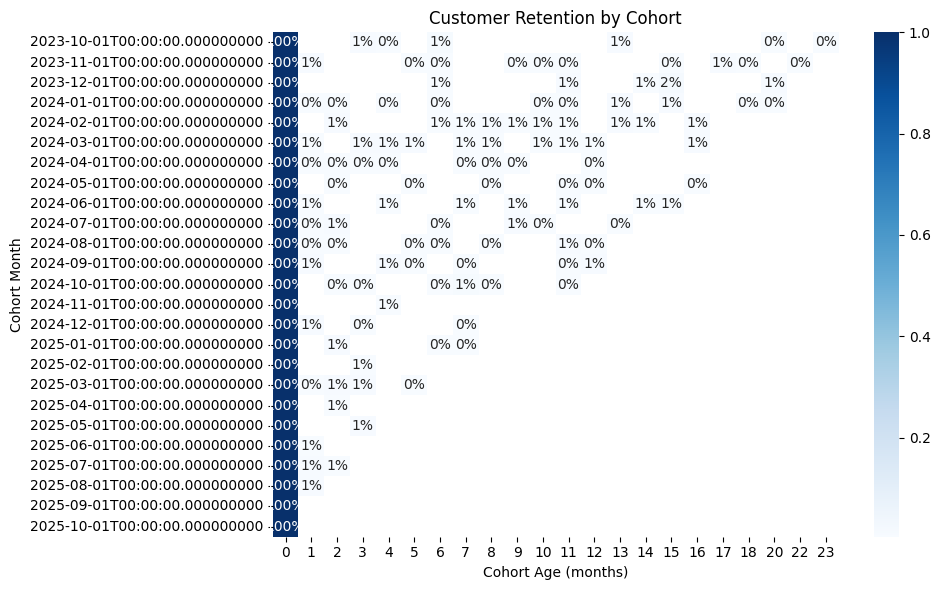

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(retention, annot=True, fmt=".0%", cmap="Blues")
plt.title("Customer Retention by Cohort")
plt.ylabel("Cohort Month")
plt.xlabel("Cohort Age (months)")
plt.tight_layout()
plt.show()


In [5]:
import datetime as dt

snapshot_date = orders["order_date"].max() + pd.Timedelta(days=1)

rfm = (
    orders.groupby("customer_id")
    .agg(
        recency=("order_date", lambda x: (snapshot_date - x.max()).days),
        frequency=("order_id", "nunique"),
        monetary=("sales", "sum")
    )
    .reset_index()
)
rfm.head()


,customer_id,recency,frequency,monetary
0,C1,643,1,158876.8
1,C10,720,1,14384.0
2,C100,213,1,77549.4
3,C1000,566,1,11985.2
4,C1001,59,2,203579.4


In [6]:
rfm["r_quartile"] = pd.qcut(rfm["recency"], 4, labels=[4,3,2,1])  # lower recency = better
rfm["f_quartile"] = pd.qcut(rfm["frequency"].rank(method="first"), 4, labels=[1,2,3,4])
rfm["m_quartile"] = pd.qcut(rfm["monetary"], 4, labels=[1,2,3,4])

rfm["rfm_score"] = (
    rfm["r_quartile"].astype(int)
    + rfm["f_quartile"].astype(int)
    + rfm["m_quartile"].astype(int)
)
rfm.head()


,customer_id,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score
0,C1,643,1,158876.8,1,1,3,5
1,C10,720,1,14384.0,1,1,1,3
2,C100,213,1,77549.4,3,1,2,6
3,C1000,566,1,11985.2,1,1,1,3
4,C1001,59,2,203579.4,4,4,4,12


In [7]:
def segment(row):
    score = row["rfm_score"]
    if score >= 10:
        return "Champions"
    elif score >= 8:
        return "Loyal"
    elif score >= 6:
        return "Potential Loyalist"
    elif score >= 4:
        return "At Risk"
    else:
        return "Hibernating"

rfm["segment"] = rfm.apply(segment, axis=1)

segment_summary = (
    rfm.groupby("segment")
    .agg(
        customers=("customer_id", "nunique"),
        avg_monetary=("monetary", "mean"),
        total_monetary=("monetary", "sum")
    )
    .reset_index()
    .sort_values("total_monetary", ascending=False)
)

segment_summary


,segment,customers,avg_monetary,total_monetary
3,Loyal,1623,128577.879144,2.086819e+08
1,Champions,804,190656.703420,1.532880e+08
4,Potential Loyalist,1627,85506.316994,1.391188e+08
0,At Risk,694,44431.967363,3.083579e+07
2,Hibernating,96,18141.394271,1.741574e+06


In [10]:
retention.to_csv(DATA_PROCESSED / "cohort_retention.csv")
print("Saved:", DATA_PROCESSED / "cohort_retention.csv")


Saved: ..\data\processed\cohort_retention.csv


In [11]:
rfm.to_csv(DATA_PROCESSED / "rfm_segments.csv", index=False)
print("Saved:", DATA_PROCESSED / "rfm_segments.csv")


Saved: ..\data\processed\rfm_segments.csv


In [13]:
from pathlib import Path
import pandas as pd

DATA_PROCESSED = Path("../data/processed")

# cohort_retention is your pivot where:
# index = cohort_month, columns = cohort_index, values = retention_rate

# 1) Reset index so cohort_month becomes a column
retention_reset = retention.reset_index()

# 2) Convert wide -> long
retention_long = retention_reset.melt(
    id_vars="cohort_month",
    var_name="cohort_age",
    value_name="retention_rate"
)

# 3) Clean types
retention_long["cohort_age"] = retention_long["cohort_age"].astype(int)
retention_long["retention_rate"] = retention_long["retention_rate"].astype(float)

retention_long.head()


,cohort_month,cohort_age,retention_rate
0,2023-10-01,0,1.0
1,2023-11-01,0,1.0
2,2023-12-01,0,1.0
3,2024-01-01,0,1.0
4,2024-02-01,0,1.0


In [14]:
output_path = DATA_PROCESSED / "cohort_retention_long.csv"
retention_long.to_csv(output_path, index=False)
print("Saved:", output_path)


Saved: ..\data\processed\cohort_retention_long.csv
